In [1]:
import pandas as pd
df= pd.read_csv("C:\\Users\\abc\\Downloads\\PRCP-1000-ProtugeseBank\\Data\\bank-full.csv",sep=";")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [3]:
#df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df1.shape

In [4]:
q1duration=df['duration'].quantile(q=0.25)
q3duration=df['duration'].quantile(q=0.75)
IQR= q3duration-q1duration
l_out= q1duration-1.5*(IQR)
u_out= q3duration+1.5*(IQR)
print("lower outlier in duration",l_out)
print("upper outlier in duration",u_out)
upper_duration=df[df['duration']>643.0]['duration'].count()
lower_duration=df[df['duration']<-221]['duration'].count()
print('number of upper outliers in duration : ', upper_duration )
print('number of lower outliers in duration : ', lower_duration )
print('percentage of upper outliers in duration : ', upper_duration*100/len(df),'%')
print('percentage of lower outliers in duration : ', lower_duration*100/len(df),'%')


lower outlier in duration -221.0
upper outlier in duration 643.0
number of upper outliers in duration :  3235
number of lower outliers in duration :  0
percentage of upper outliers in duration :  7.155338302625467 %
percentage of lower outliers in duration :  0.0 %


In [5]:
q1age=df['age'].quantile(q=0.25)
q3age=df['age'].quantile(q=0.75)
IQR= q3age-q1age
l_out_age= q1age-1.5*(IQR)
u_out_age= q3age+1.5*(IQR)
print("lower outlier in age",l_out_age)
print("upper outlier in age",u_out_age)
upper_age=df[df['age']>70.5]['age'].count()
lower_age=df[df['age']<-10.5]['age'].count()
print('number of upper outliers in age : ', upper_age )
print('number of lower outliers in age : ', lower_age )
print('percentage of upper outliers in age : ', upper_age*100/len(df),'%')
print('percentage of lower outliers in age : ', lower_age*100/len(df),'%')



lower outlier in age 10.5
upper outlier in age 70.5
number of upper outliers in age :  487
number of lower outliers in age :  0
percentage of upper outliers in age :  1.0771714848156422 %
percentage of lower outliers in age :  0.0 %


In [6]:
q1bal=df['balance'].quantile(q=0.25)
q3bal=df['balance'].quantile(q=0.75)
IQR= q3bal-q1bal
l_out= q1bal-1.5*(IQR)
u_out= q3bal+1.5*(IQR)
print("lower outlier in bal",l_out)
print("upper outlier in bal",u_out)
upper_bal=df[df['balance']>3462.0]['balance'].count()
lower_bal=df[df['balance']<-1962.0]['balance'].count()
print('number of upper outliers in bal : ', upper_bal )
print('number of lower outliers in bal : ', lower_bal )
print('percentage of upper outliers in bal : ', upper_bal*100/len(df),'%')
print('percentage of lower outliers in bal : ', lower_bal*100/len(df),'%')

lower outlier in bal -1962.0
upper outlier in bal 3462.0
number of upper outliers in bal :  4712
number of lower outliers in bal :  17
percentage of upper outliers in bal :  10.42224237464334 %
percentage of lower outliers in bal :  0.037601468669129195 %


In [7]:
q1cam=df['campaign'].quantile(q=0.25)
q3cam=df['campaign'].quantile(q=0.75)
IQR= q3cam-q1cam
l_out_camp= q1cam-1.5*(IQR)
u_out_camp= q3cam+1.5*(IQR)
print("lower outlier in campaign",l_out_camp)
print("upper outlier in campaign",u_out_camp)
upper_cam=df[df['campaign']>6.0]['campaign'].count()
lower_cam=df[df['campaign']<-2.0]['campaign'].count()
print('number of upper outliers in campaign : ', upper_cam )
print('number of lower outliers in campaign : ', lower_cam )
print('percentage of upper outliers in campaign : ', upper_cam*100/len(df),'%')
print('percentage of lower outliers in campaign : ', lower_cam*100/len(df),'%')

lower outlier in campaign -2.0
upper outlier in campaign 6.0
number of upper outliers in campaign :  3064
number of lower outliers in campaign :  0
percentage of upper outliers in campaign :  6.7771117648359915 %
percentage of lower outliers in campaign :  0.0 %


In [8]:
q1pday=df['pdays'].quantile(q=0.25)
q3pday=df['pdays'].quantile(q=0.75)
IQR= q3pday-q1pday
l_out= q1pday-1.5*(IQR)
u_out= q3pday+1.5*(IQR)
print("lower outlier in pdays",l_out)
print("upper outlier in pdays",u_out)
upper_pday=df[df['pdays']>-1.0]['pdays'].count()
lower_pday=df[df['pdays']<-1.0]['pdays'].count()
print('number of upper outliers in pdays : ', upper_pday )
print('number of lower outliers in pdays : ', lower_pday )
print('percentage of upper outliers in pdays : ', upper_pday*100/len(df),'%')
print('percentage of lower outliers in pdays  : ', lower_pday*100/len(df),'%')

lower outlier in pdays -1.0
upper outlier in pdays -1.0
number of upper outliers in pdays :  8257
number of lower outliers in pdays :  0
percentage of upper outliers in pdays :  18.263254517705867 %
percentage of lower outliers in pdays  :  0.0 %


In [9]:
q1pre=df['previous'].quantile(q=0.25)
q3pre=df['previous'].quantile(q=0.75)
IQR= q3pre-q1pre
l_out= q1pre-1.5*(IQR)
u_out= q3pre+1.5*(IQR)
print("lower outlier in previous",l_out)
print("upper outlier in previous",u_out)
upper_pre=df[df['previous']>0]['previous'].count()
lower_pre=df[df['previous']<0]['previous'].count()
print('number of upper outliers in previous : ', upper_pre )
print('number of lower outliers in previous : ', lower_pre )
print('percentage of upper outliers in previous : ', upper_pre*100/len(df),'%')
print('percentage of lower outliers in previous  : ', lower_pre*100/len(df),'%')

lower outlier in previous 0.0
upper outlier in previous 0.0
number of upper outliers in previous :  8257
number of lower outliers in previous :  0
percentage of upper outliers in previous :  18.263254517705867 %
percentage of lower outliers in previous  :  0.0 %


In [10]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

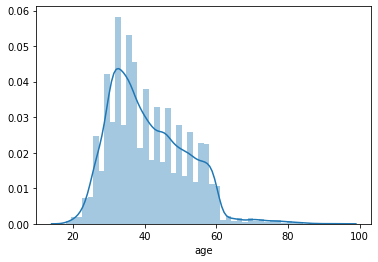

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(df.age)

age isn't normally distributed

In [12]:
df['age'].median()

39.0

In [13]:
print("lower outlier in age",l_out_age)
print("upper outlier in age",u_out_age)

lower outlier in age 10.5
upper outlier in age 70.5


In [14]:
for i in df.age:
    if i>u_out_age:
        df.replace(i,df['age'].median(),inplace=True)
        

In [15]:
upper_age=df[df['age']>70.5]['age'].count()
lower_age=df[df['age']<-10.5]['age'].count()
print('number of upper outliers in age : ', upper_age )
print('number of lower outliers in age : ', lower_age )
print('percentage of upper outliers in age : ', upper_age*100/len(df),'%')
print('percentage of lower outliers in age : ', lower_age*100/len(df),'%')



number of upper outliers in age :  0
number of lower outliers in age :  0
percentage of upper outliers in age :  0.0 %
percentage of lower outliers in age :  0.0 %


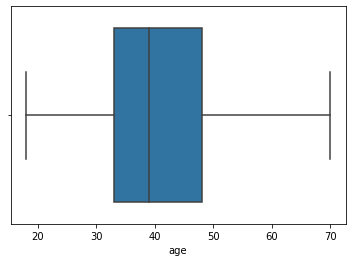

In [16]:
sns.boxplot(df.age)

In [17]:
#df.campaign.describe()

In [18]:
#sns.distplot(df.campaign)

In [19]:
#f['campaign'].median()

In [20]:
#print("lower outlier in age",l_out_camp)
#print("upper outlier in age",u_out_camp)

In [21]:
#for i in df.campaign:
   # if i>u_out_camp:
      #  df.replace(i,df['campaign'].median(),inplace=True)
        

In [22]:
#upper_cam=df[df['campaign']>6.0]['campaign'].count()
#lower_cam=df[df['campaign']<-2.0]['campaign'].count()
#print('number of upper outliers in campaign : ', upper_cam )
#print('number of lower outliers in campaign : ', lower_cam )
#print('percentage of upper outliers in campaign : ', upper_cam*100/len(df),'%')
#print('percentage of lower outliers in campaign : ', lower_cam*100/len(df),'%')



In [23]:
#sns.boxplot(df.campaign)

In [24]:
df.shape

(45211, 17)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.job=le.fit_transform(df.job)
df.marital=le.fit_transform(df.marital)
df.education=le.fit_transform(df.education)
df.default=le.fit_transform(df.default)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.contact=le.fit_transform(df.contact)
df.month=le.fit_transform(df.month)
df.y=le.fit_transform(df.y)
df.poutcome=le.fit_transform(df.poutcome)

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,39,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,39,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [27]:
x=df.iloc[:,:-1]
y= df.y

In [214]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)


In [216]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))


Actual Classes Counter({0: 26747, 1: 3544})
SMOTE Classes Counter({0: 26747, 1: 26747})


# FEATURE SELECTION

In [217]:
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot

In [218]:
model = XGBClassifier()
model.fit(x_train_smote,y_train_smote)

C:\Users\abc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[0.01276957 0.04261902 0.01596833 0.04170095 0.01198853 0.02115223
 0.09950285 0.03292196 0.17173749 0.02730771 0.0724408  0.12561576
 0.075156   0.0157247  0.12131164 0.11208241]


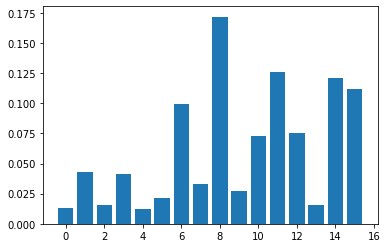

In [258]:
print(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [259]:
data  = pd.DataFrame(data = model.feature_importances_ ,columns=['feature_importance'] ,index=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome'])

data.sort_values(by='feature_importance', ascending=False)

,feature_importance
contact,0.171737
duration,0.125616
previous,0.121312
poutcome,0.112082
housing,0.099503
campaign,0.075156
month,0.072441
job,0.042619
education,0.041701
loan,0.032922


## Training model using selected features

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,39,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,39,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [30]:
data = df.drop(['age','job','marital','education','default','balance','day','pdays','loan','month'],
            axis=1 )


In [31]:
x1=data.iloc[:,:-1]
y1=data.y

In [32]:
x1

,housing,contact,duration,campaign,previous,poutcome
0,1,2,261,1,0,3
1,1,2,151,1,0,3
2,1,2,39,1,0,3
3,1,2,39,1,0,3
4,0,2,198,1,0,3
...,...,...,...,...,...,...
45206,0,0,977,3,0,3
45207,0,0,456,2,0,3
45208,0,0,1127,5,3,2
45209,0,1,508,4,0,3


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x1, y1, test_size=0.30, random_state=42,stratify=y1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 27945, 1: 3702})
SMOTE Classes Counter({0: 27945, 1: 27945})


In [227]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train_smote,y_train_smote)
ls_predictions = logmodel.predict(x_test)


In [228]:


print(accuracy_score(y_test,ls_predictions))

0.7952668829253907


accuracy of untuned logistic regression with selected features

In [36]:
from sklearn.tree import DecisionTreeClassifier
dismodel = DecisionTreeClassifier()
dismodel.fit(x_train_smote,y_train_smote)
dis_prediction = dismodel.predict(x_test)



In [230]:
print(accuracy_score(y_test,dis_prediction))

0.8460631082276615


accuracy of untuned decision tree with selected features

In [231]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier()
rfmodel.fit(x_train_smote,y_train_smote)
rfpredict=rfmodel.predict(x_test)

In [232]:
print(accuracy_score(y_test,rfpredict))

0.8460631082276615


accuracy of untuned Random forest with selected features

In [233]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier()
knnmodel.fit(x_train_smote,y_train_smote)
knnpredict=knnmodel.predict(x_test)


In [234]:
print(accuracy_score(y_test,knnpredict))

0.8252727808905927


accuracy of untuned knn classifier with selected features

In [235]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train_smote,y_train_smote)
xgbpredict=model.predict(x_test)

C:\Users\abc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [236]:
print(accuracy_score(y_test,xgbpredict))

0.8273370687112946


accuracy of untuned XGBoost with selected features

In [237]:
from sklearn import svm
svmmodel=svm.SVC()
svmmodel.fit(x_train_smote,y_train_smote)
svmpredict=svmmodel.predict(x_test)

In [238]:
print(accuracy_score(y_test,svmpredict))

0.8164995576526098


accuracy of untuned SVM with selected features

Here best performance is shown by decision tree and random forest classifier
we will perform tuning on both to check for more accuracy

In [37]:
from sklearn.tree import DecisionTreeClassifier
dismodel = DecisionTreeClassifier()
param_dict = {
    'criterion': ['gini','entropy'],
    'max_depth': (range (1,10)),
    'min_samples_split' : (range(1,10)),
    'min_samples_leaf'  : (range(1,5))
}

grid =  GridSearchCV(dismodel,param_grid=param_dict,cv=10,verbose=10,n_jobs=-1)
grid.fit(x_train_smote,y_train_smote)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061        nan 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
        nan 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061        nan 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
        nan 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061        nan 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
        nan 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061        nan 0.72249061 0.72249061
 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061 0.72249061
        nan 0.76876006 0.76876006 0.76876006 0.76876006

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=10)

In [38]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [41]:
from sklearn.tree import DecisionTreeClassifier
dismodel = DecisionTreeClassifier(criterion = 'gini',
    max_depth = 9,
    min_samples_split =3 ,
    min_samples_leaf  = 6 )
dismodel.fit(x_train_smote,y_train_smote)
dis_prediction = dismodel.predict(x_test)
print(accuracy_score(y_test,dis_prediction))

0.79438218814509


 accuracy of tuned decision tree for selected features 







accuracy of untuned decision tree is better than tuned model of decision tree 

In [54]:
print(classification_report(y_test, dis_prediction))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11977
           1       0.34      0.81      0.48      1587

    accuracy                           0.79     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.90      0.79      0.83     13564



In [43]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)

grid_search = GridSearchCV(estimator=rfmodel, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_smote, y_train_smote)

In [47]:
grid_result.best_params_


{'max_features': 'sqrt', 'n_estimators': 1000}

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier(max_features= 'sqrt', n_estimators = 100)
rfmodel.fit(x_train_smote,y_train_smote)
rfpredict=rfmodel.predict(x_test)
print(accuracy_score(y_test,rfpredict))


0.8473901503981126


tuned accuracy of random forest with selected features

In [53]:
print(classification_report(y_test, rfpredict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11977
           1       0.38      0.52      0.44      1587

    accuracy                           0.84     13564
   macro avg       0.66      0.70      0.67     13564
weighted avg       0.87      0.84      0.85     13564



we are getting a good average accuracy but performece for class yes of dependent feature  is not good

lets train our model with all feature rather than just selected and compute performece 

# Model Training using all features

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,39,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,39,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [39]:
x2=df.iloc[:,:-1]
y2= df['y']

In [40]:
from sklearn.model_selection import train_test_split
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split( x2, y2, test_size=0.30, random_state=42,stratify=y2)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train_all=scaler.fit_transform(x_train_all)
x_test_all=scaler.transform(x_test_all)


In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

x_train_smote2, y_train_smote2 = smote.fit_resample(x_train_all.astype('float'),y_train_all)
from collections import Counter
print("Actual Classes",Counter(y_train_all))
print("SMOTE Classes",Counter(y_train_smote2))

Actual Classes Counter({0: 27945, 1: 3702})
SMOTE Classes Counter({0: 27945, 1: 27945})


In [44]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train_smote2,y_train_smote2)
ls_predictions2 = logmodel.predict(x_test_all)
print(accuracy_score(y_test_all,ls_predictions2))

0.8095694485402536


C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy of untuned Logistic Regression model with all features

In [45]:
from sklearn.tree import DecisionTreeClassifier
dismodel = DecisionTreeClassifier()
dismodel.fit(x_train_smote2,y_train_smote2)
dis_prediction = dismodel.predict(x_test_all)

print(accuracy_score(y_test_all,dis_prediction))

0.8552049542907697


accuracy of untuned Decision tree model with all features

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier()
rfmodel.fit(x_train_smote2,y_train_smote2)
rfpredict=rfmodel.predict(x_test_all)
print(accuracy_score(y_test_all,rfpredict))

0.8923621350634031


accuracy of untuned Random Forest model with all features

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier()
knnmodel.fit(x_train_smote2,y_train_smote2)
knnpredict=knnmodel.predict(x_test_all)

print(accuracy_score(y_test_all,knnpredict))

0.8163521085225597


accuracy of untuned KNN model with all features

In [48]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train_smote2,y_train_smote2)
xgbpredict=model.predict(x_test_all)
print(accuracy_score(y_test_all,knnpredict))


C:\Users\abc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8163521085225597


accuracy of untuned XGBoost model with all features

In [177]:
from sklearn import svm
svmmodel=svm.SVC()
svmmodel.fit(x_train_smote2,y_train_smote2)
svmpredict=svmmodel.predict(x_test_all)
print(accuracy_score(y_test_all,svmpredict))

0.8265260984960189


accuracy of untuned SVM model with all features

Best performance with all features is shown by random forest 

we are going to perform tuning on random forest model too see if we get more accuracy

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)

grid_search = GridSearchCV(estimator=rfmodel, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_smote2, y_train_smote2)

In [52]:
grid_search.best_score_

0.9414564322776883

In [53]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier(max_features= 'sqrt', n_estimators = 1000)
rfmodel.fit(x_train_smote2,y_train_smote2)
rfpredict=rfmodel.predict(x_test_all)
print(accuracy_score(y_test_all,rfpredict))

0.8930256561486287


In [57]:
print(classification_report(y_test_all, rfpredict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11977
           1       0.54      0.65      0.59      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.79      0.76     13564
weighted avg       0.90      0.89      0.90     13564



most acurate prediction of bank marketing data set is provided by tuned Random Forest with all features